# Zomato data analysis project

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset

dataset = pd.read_csv("Zomato data .csv")
print(dataset)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [3]:
# Reviewing the dataset.

dataset

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
# looking into dataset

dataset.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [5]:
# converting data value from column 'rate'

def handledRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataset['rate'] = dataset['rate'].apply(handledRate)
print(dataset.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
# checking for the null values.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
# Reviewing the dataset.

dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## Q.N) What type of resturant do the majority of customers order from ?

Text(0.5, 0, 'Types of resturants')

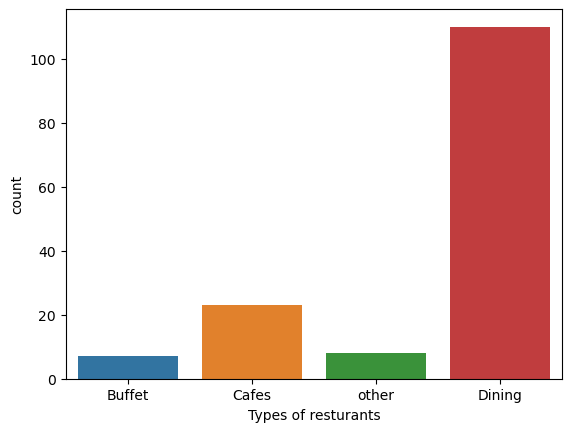

In [9]:
# finding the majority of the resturant using countplot

sns.countplot(x=dataset['listed_in(type)'])
plt.xlabel('Types of resturants')

# conclusion - majority of the resturant falls in dinning category

## Q.N) How many vote each resturant received from customers ?

Text(0.5, 1.0, 'Votes Received by Restaurants')

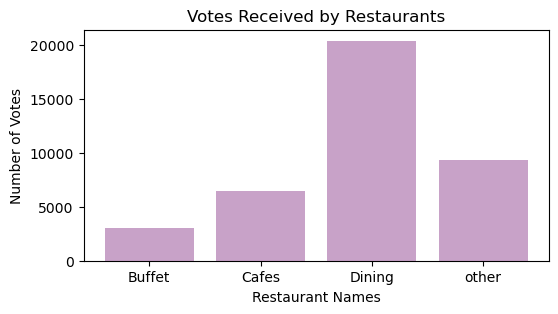

In [10]:
# grouping the value of the column votes on the basis of listed_in(type) by calculating the sum 
# using barplot to visualize the number of vote received by each resturant.

grouped_data = dataset.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.figure(figsize=(6, 3))
plt.bar(result.index, result['votes'], color='#C8A2C8')
plt.xlabel('Restaurant Names')
plt.ylabel('Number of Votes')
plt.title('Votes Received by Restaurants')

## conclusion - Dinning resturant have received maximum number of votes.

## Q.N) What are the rating that the majority of the resturant have received ?

Text(0.5, 1.0, 'rating distributions')

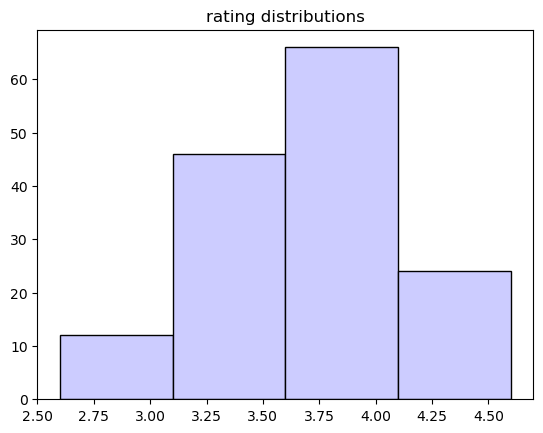

In [11]:
# using histogram to see the maximum distribution of the rating 

plt.hist(dataset['rate'], bins=4, color='#CCCCFF', edgecolor='black')
plt.title('rating distributions')

# conclusion - majority resturants has received rating between 3.6 to 4.1

## Q.N) What is the average spending on each order ?

In [12]:
# Reviewing the dataset
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

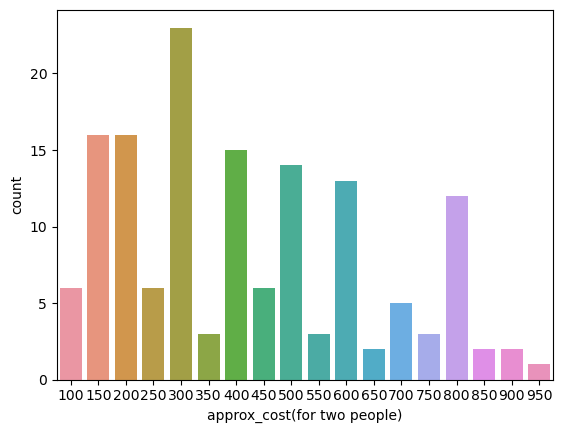

In [13]:
# using countplot for counting the average spending.

sns.countplot(x=dataset['approx_cost(for two people)'])

## conclusion - the majority of couple prefer the resturant with an approximate cost of 300 rupees

## Q.N) Which mode receives maximum rating.

In [14]:
# Reviewing the dataset.

dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

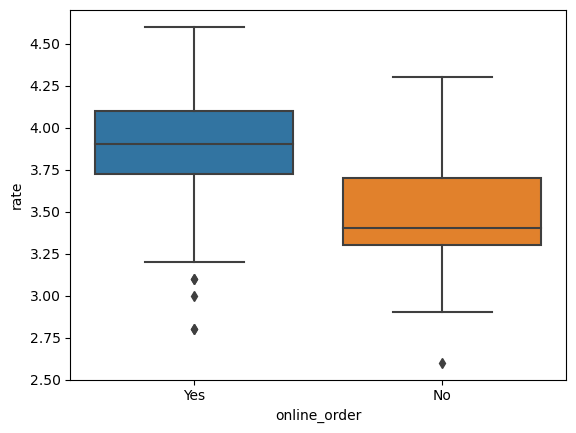

In [15]:
# finding the maximum distribution of rating according to online_order

sns.boxplot(x=dataset['online_order'], y=dataset['rate'])

## conclusion - ofline order receives lower rating comparison to online order.

## Q.N) Which types of resturant receive more ofline orders

In [16]:
# Reviewing the dataset

dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Heatmap')

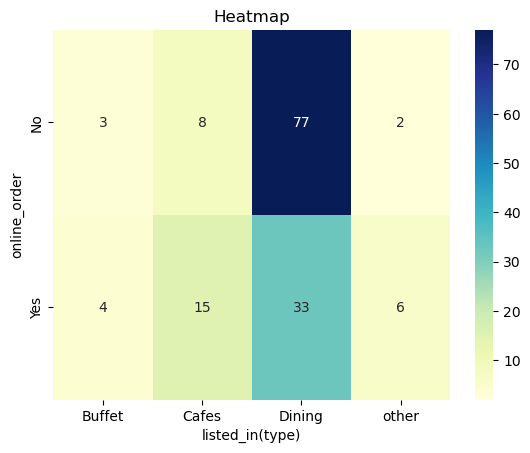

In [17]:
# Creating pivot table on the basis of index and column to analysis the number of orders for each types of 
# resturant by the help of heatmap.

value = dataset.pivot_table(index='online_order', columns='listed_in(type)', aggfunc='size', fill_value=0)
sns.heatmap(value, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('listed_in(type)')
plt.ylabel('online_order')
plt.title('Heatmap')

## conclusion - Dinning resturant receives maximum number of oflines order.